# **Convolutional Neural Network**
**Preprocessing images**

In [3]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 41.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 54.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 47.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.1.1
    Uninstalling typing_extensions-4.1.1:
      Successfully uninstalled typing_extensions-4.1.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.7.0
    Uninstalling h5py-3.7.0:
      Successfully uninstalled h5py-3.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.10.1
    Uninstalling tensorboard-2.10.1:
      Successfully uninstalled tensorboard-2.10.1
ERROR: pip's dependency resolver does not currently take into acco

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models,preprocessing,regularizers,callbacks
from matplotlib import pyplot as plt

data_generator = preprocessing.image.ImageDataGenerator(rescale=1/255)  # normalisation
train_generator = data_generator.flow_from_directory('/kaggle/input/split-folders/final_FD_images/train',batch_size=10,target_size=(512,512),class_mode='binary')
val_generator = data_generator.flow_from_directory('/kaggle/input/split-folders/final_FD_images/val',color_mode='rgb',target_size=(512,512),class_mode='binary')
test_generator = data_generator.flow_from_directory('/kaggle/input/split-folders/final_FD_images/test',batch_size=10,target_size=(512,512),class_mode='binary')


Found 13133 images belonging to 2 classes.
Found 1876 images belonging to 2 classes.
Found 3754 images belonging to 2 classes.


**Model**

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5,5), activation='relu', input_shape=(512, 512, 3)))
model.add(layers.MaxPooling2D((4, 4), strides=4))
model.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.MaxPooling2D((1, 3), strides=(1,3)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='linear',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dropout(0.8))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy',tf.keras.metrics.TrueNegatives(),tf.keras.metrics.TruePositives(),tf.keras.metrics.FalseNegatives(),tf.keras.metrics.FalsePositives()])

**Fitting**

1314/1314 [==============================] - 178s 128ms/step - loss: 2.5404 - accuracy: 0.9011 - true_negatives: 6509.0000 - true_positives: 5325.0000 - false_negatives: 723.0000 - false_positives: 576.0000 - val_loss: 1.7840 - val_accuracy: 0.9973 - val_true_negatives: 1011.0000 - val_true_positives: 860.0000 - val_false_negatives: 4.0000 - val_false_positives: 1.0000


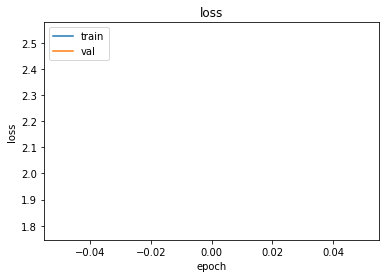

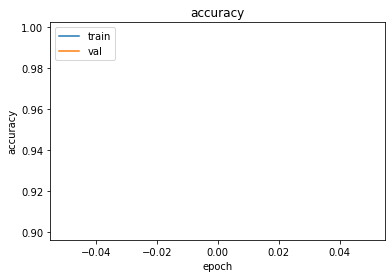

In [6]:
history=model.fit(train_generator,epochs=15,validation_data=val_generator,shuffle=True, callbacks=[callbacks.EarlyStopping(monitor='val_acc', patience=5,restore_best_weights=True)])
# using early stopping method to train the model to achieve maximum accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Testing**

In [7]:
loss,accuracy,tn,tp,fn,fp=model.evaluate(test_generator)
print("Accuracy: ",accuracy)
print("True negative: ",tn)
print("True positive: ",tp)
print("False negative: ",fn)
print("False postive: ",fp)

376/376 [==============================] - 39s 104ms/step - loss: 1.7829 - accuracy: 0.9981 - true_negatives: 2022.0000 - true_positives: 1725.0000 - false_negatives: 4.0000 - false_positives: 3.0000
Accuracy:  0.9981353282928467
True negative:  2022.0
True positive:  1725.0
False negative:  4.0
False postive:  3.0
